PyGSLIB
========

Introduction
---------------

This is a set of test for the drillhole functions.

These functions are not part of GSLIB but are required for some basic drillhole test and processing (example desurvey)



In [1]:
#general imports  
import pygslib as gslib      
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------

Here we use arbitrary data


In [2]:
angles = pd.DataFrame (
    {'az'   : [0.,45,90,135,180,225,270,315,360,0,45,90,135,180,225,270,315],
     'dip': [90.,80,70,60,50,40,30,20,10,0,-10,-20,-30,-40,-50,-60,-70]})


In [3]:
angles

,az,dip
0,0,90
1,45,80
2,90,70
3,135,60
4,180,50
5,225,40
6,270,30
7,315,20
8,360,10
9,0,0


## Testing validation functions issort

In [4]:
print gslib.__drillhole.ang2cart.__doc__

x,y,z = ang2cart(azm,dip)

Wrapper for ``ang2cart``.

Parameters
----------
azm : input float
dip : input float

Returns
-------
x : float
y : float
z : float



In [5]:
angles['x']=0.
angles['y']=0.
angles['z']=0.

for i in range(len(angles)):
    x,y,z = gslib.__drillhole.ang2cart(azm=angles['az'][i],dip=angles['dip'][i])
    angles['x'][i]=x
    angles['y'][i]=y
    angles['z'][i]=z

angles['az_back']=0.
angles['dip_back']=0.

for i in range(len(angles)):
    a,d = gslib.__drillhole.cart2ang(x=angles['x'][i],
                                       y=angles['y'][i],
                                       z=angles['z'][i])
    angles['az_back'][i]=a
    angles['dip_back'][i]=d

    
angles

,az,dip,x,y,z,az_back,dip_back
0,0,90,-0.000000e+00,-4.371139e-08,-1.000000,0.000000,90.000000
1,45,80,1.227878e-01,1.227878e-01,-0.984808,45.000000,79.999985
2,90,70,3.420202e-01,-1.495018e-08,-0.939693,90.000000,69.999992
3,135,60,3.535534e-01,-3.535534e-01,-0.866025,135.000000,60.000000
4,180,50,-5.619428e-08,-6.427876e-01,-0.766044,180.000015,49.999996
5,225,40,-5.416752e-01,-5.416753e-01,-0.642788,225.000000,39.999996
6,270,30,-8.660254e-01,1.032725e-08,-0.500000,270.000000,30.000000
7,315,20,-6.644631e-01,6.644629e-01,-0.342020,314.999969,19.999998
8,360,10,1.721892e-07,9.848077e-01,-0.173648,0.000010,9.999999
9,0,0,0.000000e+00,1.000000e+00,-0.000000,0.000000,0.000000


## 1D interpolation of angles

In [6]:
print gslib.__drillhole.interp_ang1d.__doc__

azm,dip = interp_ang1d(azm1,dip1,azm2,dip2,len12,d1)

Wrapper for ``interp_ang1d``.

Parameters
----------
azm1 : input float
dip1 : input float
azm2 : input float
dip2 : input float
len12 : input float
d1 : input float

Returns
-------
azm : float
dip : float



### interpolate between two non vertical (dip=90) directions
**this works ** 

0 0.0 74.9999923706
1 17.5148983002 70.0589294434
2 37.3490066528 66.0869979858
3 55.3591079712 62.657913208
4 69.1341018677 59.5869216919
5 78.9467468262 56.7740516663
6 85.9129104614 54.1579551697
7 90.9761581421 51.6977882385
8 94.7679443359 49.3647232056
9 97.6901321411 47.1375312805
10 99.9999923706 44.9999961853


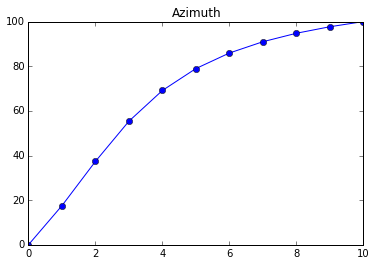

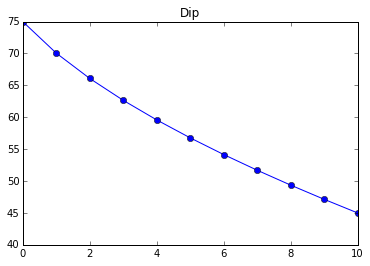

In [7]:
a=[]
d=[]
l=[]
for i in range(11):
    azm,dip = gslib.__drillhole.interp_ang1d(azm1=0,
                                             dip1=75,
                                             azm2=100,
                                             dip2=45,
                                             len12=10,
                                             d1=i)
    print i, azm,dip
    
    a.append(azm)
    d.append(dip)
    l.append(i)

plt.plot(l,a, '-o')
plt.title('Azimuth')
plt.show()
plt.plot(l,d, '-o')
plt.title('Dip')
plt.show()

### Interpolate between vertical direction (dip=90) and non vertical

** this works but how to interpolate azimuth of a vertical drection? ** The result is a discontinuity and this is good for drillhole desurvey!

0 0.0 90.0
1 100.000022888 76.0986022949
2 100.000007629 70.2916412354
3 100.0 65.8016662598
4 100.0 61.9872016907
5 99.9999923706 58.6002883911
6 99.9999923706 55.5139427185
7 99.9999923706 52.6528739929
8 99.9999923706 49.9680023193
9 99.9999923706 47.4253120422
10 99.9999923706 44.9999961853


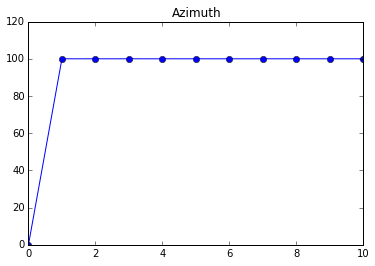

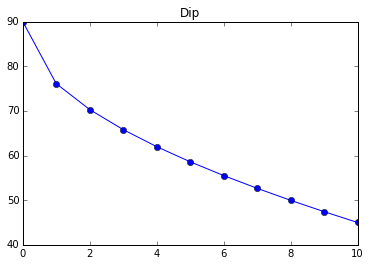

In [8]:
a=[]
d=[]
l=[]
for i in range(11):
    azm,dip = gslib.__drillhole.interp_ang1d(azm1=0,
                                             dip1=90,
                                             azm2=100,
                                             dip2=45,
                                             len12=10,
                                             d1=i)
    print i, azm,dip
    
    a.append(azm)
    d.append(dip)
    l.append(i)

plt.plot(l,a, '-o')
plt.title('Azimuth')
plt.show()
plt.plot(l,d, '-o')
plt.title('Dip')
plt.show()

### Interpolate between two vertical directions (dip=90) 

The result is a discontinuity + inestable and not an issue for drillhole desurvey!

0 0.0 90.0
1 186.366500854 90.0
2 194.433242798 90.0
3 204.512786865 90.0
4 216.593643188 90.0
5 230.0 90.0
6 243.406341553 90.0
7 255.487197876 90.0
8 265.566741943 90.0
9 273.633514404 90.0
10 279.999969482 90.0


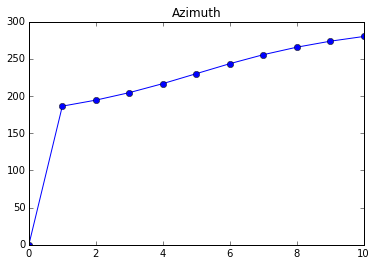

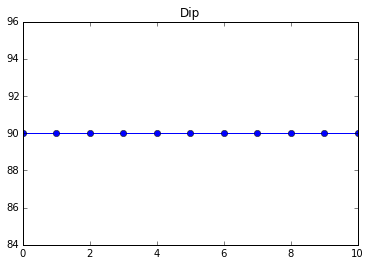

In [9]:
a=[]
d=[]
l=[]
for i in range(11):
    azm,dip = gslib.__drillhole.interp_ang1d(azm1=0,
                                             dip1=90,
                                             azm2=100,
                                             dip2=90,
                                             len12=10,
                                             d1=i)
    print i, azm,dip
    
    a.append(azm)
    d.append(dip)
    l.append(i)

plt.plot(l,a, '-o')
plt.title('Azimuth')
plt.show()
plt.plot(l,d, '-o')
plt.title('Dip')
plt.show()

## Desurvey function (minimum curvature)
We use here minimum curvature with balanced tangential if the dog-leg (dl) is zero and makes the Ratio Factor (rf) undefined. It works like this

```
    ! calculate the dog-leg (dl) and the Ratio Factor (rf)
    dl = acos(cos(i2-i1)-sin(i1)*sin(i2)*(1-cos(a2-a1))) !
    
    if (dl/=0) then
        rf = 2*tan(dl/2)/dl  ! minimum curvature
    else
        rf=1 ! balanced tangential
    end if
    
    
    dz = 0.5*len12*(cos(i1)+cos(i2))*rf
    dn = 0.5*len12*(sin(i1)*cos(a1)+sin(i2)*cos(a2))*rf
    de = 0.5*len12*(sin(i1)*sin(a1)+sin(i2)*sin(a2))*rf
```

where i1,i2 are inclination angles or (90-dip) and a1, a2 are the azimuths at survey points 1,2 (with length from collar at 1 < length from collar at 2). The input angles are azimuth and dip (in degrees). Dip angles ar 90 downdip (ex. surface drillhole) to -90 upwards (ex. underground drillholes pointing to surface)

In [10]:
print gslib.__drillhole.dsmincurb.__doc__

dz,dn,de = dsmincurb(len12,az1,dip1,az2,dip2)

Wrapper for ``dsmincurb``.

Parameters
----------
len12 : input float
az1 : input float
dip1 : input float
az2 : input float
dip2 : input float

Returns
-------
dz : float
dn : float
de : float



In [11]:
#This works
dz,dn,de=gslib.__drillhole.dsmincurb (len12=10,az1=0,dip1=90,az2=0,dip2=90)
l= np.sqrt(dz**2+dn**2+de**2)
print dz,dn,de,l
dz,dn,de=gslib.__drillhole.dsmincurb (len12=10,az1=0,dip1=45,az2=0,dip2=45)
l= np.sqrt(dz**2+dn**2+de**2)
print dz,dn,de,l
dz,dn,de=gslib.__drillhole.dsmincurb (len12=10,az1=90,dip1=45,az2=90,dip2=45)
l= np.sqrt(dz**2+dn**2+de**2)
print dz,dn,de,l
dz,dn,de=gslib.__drillhole.dsmincurb (len12=10,az1=90,dip1=45,az2=0,dip2=45)
l= np.sqrt(dz**2+dn**2+de**2)
print dz,dn,de,l
dz,dn,de=gslib.__drillhole.dsmincurb (len12=100,az1=20,dip1=75,az2=45,dip2=65)
l= np.sqrt(dz**2+dn**2+de**2)
print dz,dn,de,l

10.0 0.0 0.0 10.0
7.07106781006 7.07106781006 0.0 9.99999999744
7.07106781006 -3.09086203742e-07 7.07106781006 9.99999999744
7.79696798325 3.89848351479 3.89848399162 9.54929635522
94.0123443604 27.218328476 19.4507751465 99.787228396


***Note that distance calculated between endpoints is less than the the distance in the drillhole due to the drillhole curvature***

## Test desurvey a point on a drillhole trace

In [12]:
print gslib.__drillhole.desurv1dh.__doc__

azt,dipt,xt,yt,zt = desurv1dh(lengs,azs,dips,xc,yc,zc,lpt,[ns])

Wrapper for ``desurv1dh``.

Parameters
----------
lengs : input rank-1 array('f') with bounds (ns)
azs : input rank-1 array('f') with bounds (ns)
dips : input rank-1 array('f') with bounds (ns)
xc : input float
yc : input float
zc : input float
lpt : input float

Other Parameters
----------------
ns : input int, optional
    Default: len(lengs)

Returns
-------
azt : float
dipt : float
xt : float
yt : float
zt : float



In [13]:
# This works 

# survey
lengs = [  0, 10, 20, 30, 40]
azs   = [  0, 0, 0, 0, 0]
dips  = [ 70, 70, 70, 70, 70]
xc    = 0
yc    = 0
zc    = 0
# interval table (ex. assay)
midt  = [  0, 10, 20, 30]

for interv in midt: 
    azmt,dipmt,xmt,ymt,zmt = gslib.__drillhole.desurv1dh(lengs,azs,dips,xc,yc,zc,interv)
    print '{0:10.2f} {1:10.2f} {2:10.2f} {3:10.2f} {4:10.2f} '.format(azmt,dipmt,xmt,ymt,zmt)

      0.00      70.00       0.00       0.00       0.00 
      0.00      70.00       0.00       3.42      -9.40 
      0.00      70.00       0.00       6.84     -18.79 
      0.00      70.00       0.00      10.26     -28.19 
